# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

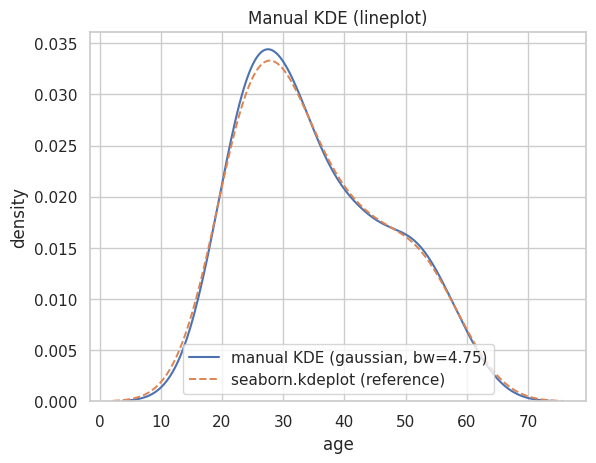

In [22]:
# Setup
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Use the course pretrial data
url_trial = "https://raw.githubusercontent.com/KendallFreese/visualization_assignment/main/data/pretrial_data.csv"
trial = pd.read_csv(url_trial)

x = trial['age']                                     # Age
x = x[x.isna()==False].sample(50, random_state=10)  # use 50 obs as in class
x = x.to_numpy().astype(float)                    # numpy array for broadcasting

# Choose kernel & grid parameters (change kernel_name to 'uniform' or 'epanechnikov')
kernel_name = "gaussian"    # 'gaussian' (default), 'uniform'/'bump', 'epanechnikov'
gridsize = 200
cut = 3.0

# Silverman plug-in bandwidth
n = x.size
s = x.std(ddof=1)
iqr = np.percentile(x, 75) - np.percentile(x, 25)
a = min(s, iqr/1.34) if np.isfinite(iqr) else s
h = 0.9 * a * n**(-1/5) # Silverman bandwidth

# Evaluation grid & standardized distances
lo = x.min() - cut*h
hi = x.max() + cut*h
grid = np.linspace(lo, hi, gridsize)
z = (grid[:, None] - x[None, :]) / h  # shape (G, N)

# Kernel values
kname = kernel_name.lower()
if kname == "gaussian":
    K = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * z**2)
elif kname in ("uniform", "bump", "rect", "rectangular"):
    K = np.where(np.abs(z) <= 1, 0.5, 0.0)
elif kname in ("epanechnikov", "epa"):
    K = np.where(np.abs(z) <= 1, 0.75*(1 - z**2), 0.0)
else:
    raise ValueError("kernel must be 'gaussian', 'uniform'/'bump', or 'epanechnikov'")

# Density & plot (seaborn.lineplot)
f = K.sum(axis=1) / (n * h)

sns.lineplot(x=grid, y=f, label=f"manual KDE ({kernel_name}, bw={h:.3g})")
plt.xlabel("age"); plt.ylabel("density")
plt.title("Manual KDE (lineplot)")

# Compare with seaborn's kdeplot (reference only)
sns.kdeplot(x=x, lw=1.4, linestyle="--", label="seaborn.kdeplot (reference)")
plt.legend(); plt.show()

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Q1
(3798, 63)
3798


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Q2
The dimensions of the data are (3798, 63). There are 3798 observations.
There are 63 variables total, with level, control, aid_value, and grad_100_value as the main variables.
Q3


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


level,2-year,4-year
control,,
Private for-profit,46.9,53.1
Private not-for-profit,5.4,94.6
Public,59.4,40.6


level,2-year,4-year
control,,
Private for-profit,31.9,22.5
Private not-for-profit,4.7,50.4
Public,63.5,27.0


Some patterns I notice are that the 2-year space is dominated by Public institutions (community colleges).
The 4-year space is dominated by Private not-for-profits. For-profits are present at both levels, leaning slightly toward 4-year.
The largest single cell is 4-year, private not-for-profit (1180); the smallest is 2-year, private not-for-profit (68).
Q4


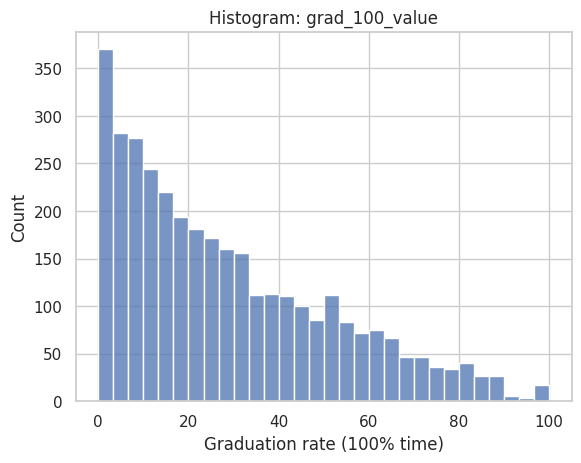

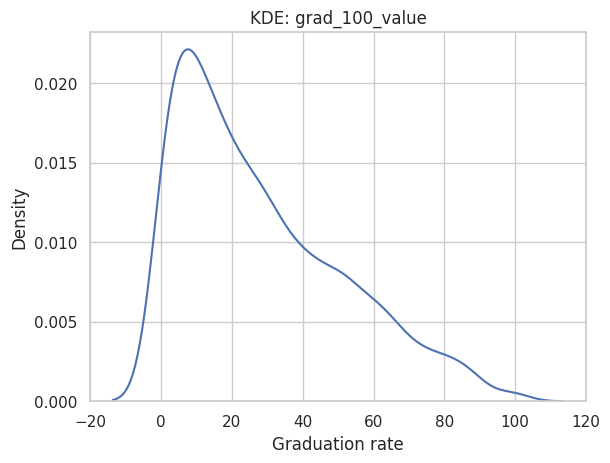

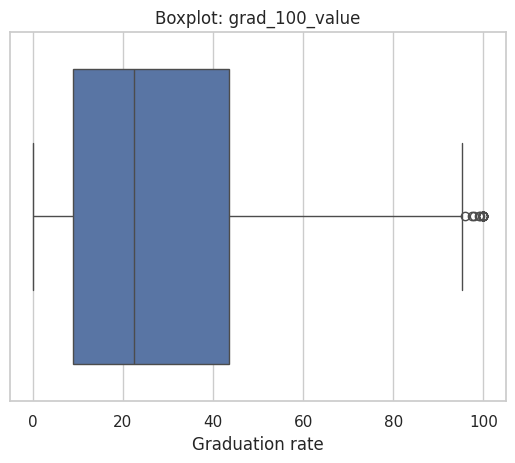

Q5


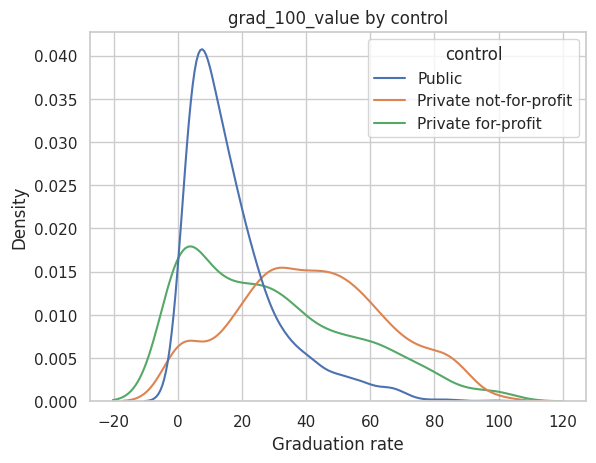

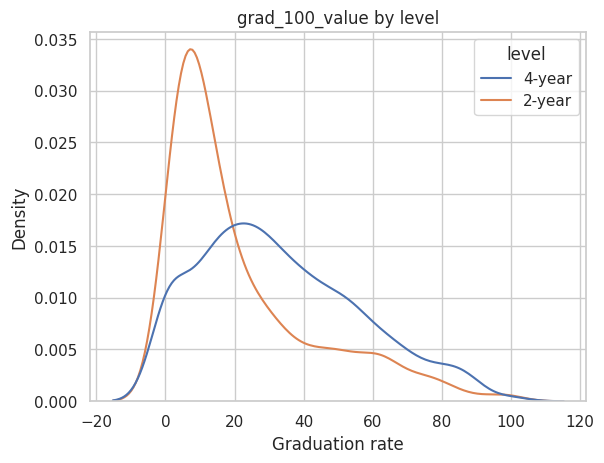

We see that 2-year institutions are mostly public, while 4-year institutions are dominated by private not-for-profit.
For-profit schools are split between 2 and 4 years. Sector composition differs sharply by level.


,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.64,21.65,0.0,6.0,13.0,30.60,100.0
4-year,2012.0,33.23,23.27,0.0,15.2,29.7,49.22,100.0


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.11,25.60,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.66,23.55,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.43,14.73,0.0,6.90,13.2,23.25,97.8


The graduation-rate distribution is shifted right for private not-for-profit and for 4-year schools, while public and 2-year schools cluster at lower rates.
Thus, 4 year private not-for-profit institutions appear to have the highest graduation rates.
Q6


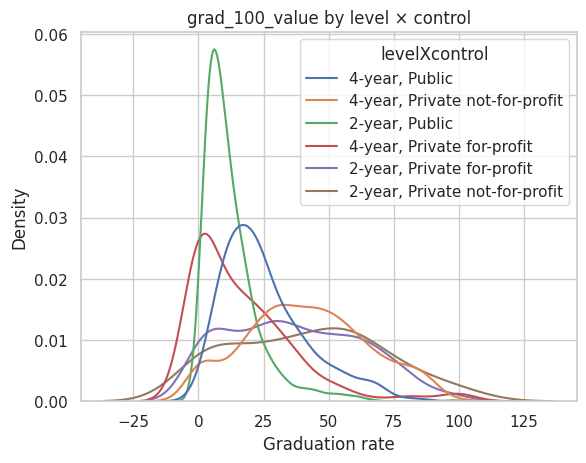

4 year, private not-for-profit institutions appear to have the best graduation rates—their KDE is furthest to the right with the highest central mass.
A small group of 2 year, private not-for-profit schools also looks high, but that subgroup is small, so 4-year private non-profits are the most robust.
Q7


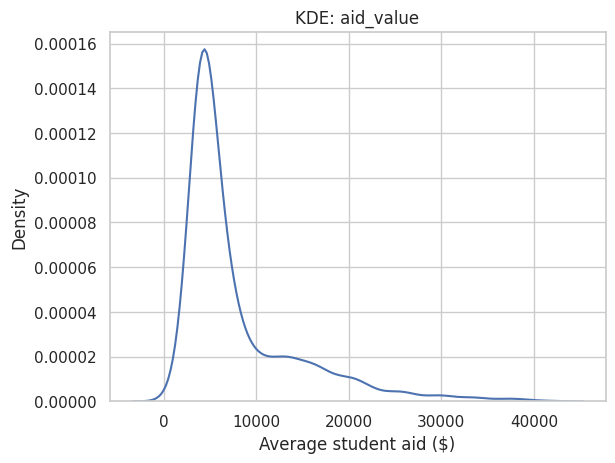

Because it mixes groups—Public 2-year schools clustered at low aid and 4-year (private not-for-profit) had much higher aid.
So, the overall distribution is strongly right-skewed.
Q8


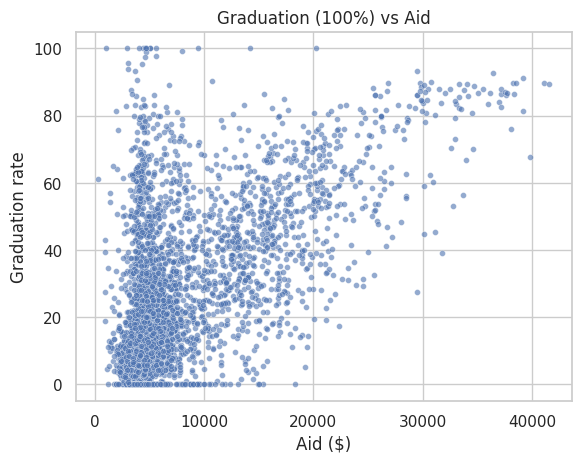

The scatter trends upward—schools with more aid generally have higher graduation rates, with many low-aid/low-grad points and a high-aid/high-grad tail.


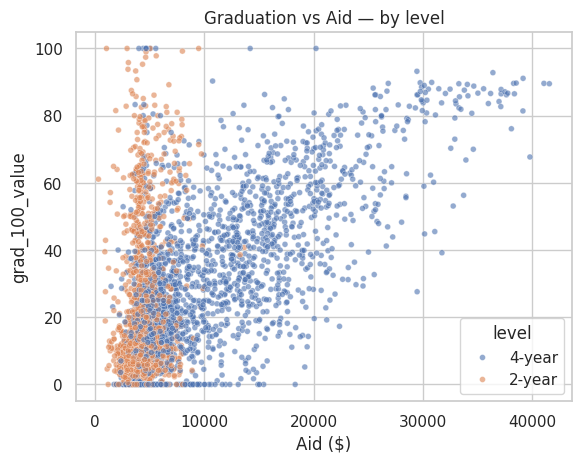

4-year schools show a strong positive association into high-aid/high-grad territory, while 2-year schools cluster at low aid with a weak relationship.


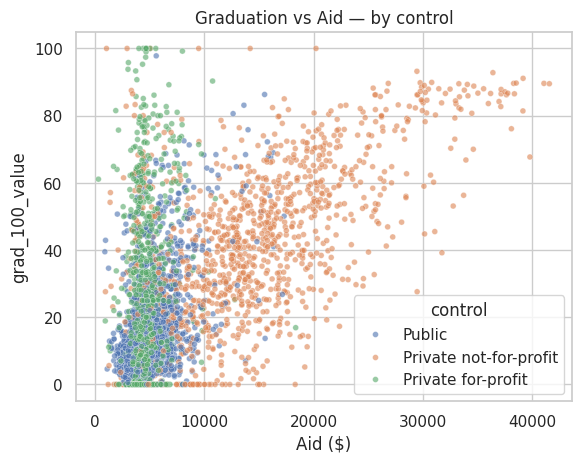

Private not-for-profits have the steepest positive pattern (public moderate, for-profit weakest), so aid seems to increase graduation rates primarily at 4-year private not-for-profit institutions.


(np.float64(0.5758792845936064),
 level
 2-year    0.211
 4-year    0.670
 dtype: float64,
 control
 Private for-profit        0.188
 Private not-for-profit    0.602
 Public                    0.482
 dtype: float64)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Q1")
url_college = "https://raw.githubusercontent.com/KendallFreese/visualization_assignment/main/data/college_completion.csv"
college = pd.read_csv(url_college)

print(college.shape)
print(len(college))
display(college.head())
college[['level','control','aid_value','grad_100_value']].head()


print("Q2")
print("The dimensions of the data are (3798, 63). There are 3798 observations.")
print("There are 63 variables total, with level, control, aid_value, and grad_100_value as the main variables.")

print("Q3")
ct = pd.crosstab(college["control"], college["level"])
row_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
col_pct = (ct.div(ct.sum(axis=0), axis=1) * 100).round(1)

display(ct); display(row_pct); display(col_pct)

print("Some patterns I notice are that the 2-year space is dominated by Public institutions (community colleges).")
print("The 4-year space is dominated by Private not-for-profits. For-profits are present at both levels, leaning slightly toward 4-year.")
print("The largest single cell is 4-year, private not-for-profit (1180); the smallest is 2-year, private not-for-profit (68).")

print("Q4")
g = college["grad_100_value"].dropna()

sns.histplot(x=g, bins=30)
plt.title("Histogram: grad_100_value"); plt.xlabel("Graduation rate (100% time)"); plt.show()

sns.kdeplot(x=g)
plt.title("KDE: grad_100_value"); plt.xlabel("Graduation rate"); plt.show()

sns.boxplot(x=g)
plt.title("Boxplot: grad_100_value"); plt.xlabel("Graduation rate"); plt.show()
g.describe(percentiles=[.10,.25,.50,.75,.90]).round(2), g.skew().round(3), g.kurtosis().round(3)

print("Q5")
sns.kdeplot(data=college, x="grad_100_value", hue="control", common_norm=False)
plt.title("grad_100_value by control"); plt.xlabel("Graduation rate"); plt.show()

sns.kdeplot(data=college, x="grad_100_value", hue="level", common_norm=False)
plt.title("grad_100_value by level"); plt.xlabel("Graduation rate"); plt.show()

print("We see that 2-year institutions are mostly public, while 4-year institutions are dominated by private not-for-profit.")
print("For-profit schools are split between 2 and 4 years. Sector composition differs sharply by level.")

by_level   = college.groupby("level")["grad_100_value"].describe().round(2)
by_control = college.groupby("control")["grad_100_value"].describe().round(2)
display(by_level); display(by_control)

print("The graduation-rate distribution is shifted right for private not-for-profit and for 4-year schools, while public and 2-year schools cluster at lower rates.")
print("Thus, 4 year private not-for-profit institutions appear to have the highest graduation rates.")

print("Q6")

college["levelXcontrol"] = college["level"].astype(str) + ", " + college["control"].astype(str)

sns.kdeplot(data=college, x="grad_100_value", hue="levelXcontrol", common_norm=False)
plt.title("grad_100_value by level × control"); plt.xlabel("Graduation rate"); plt.show()

college.groupby("levelXcontrol")["grad_100_value"].describe().round(2).sort_values("mean", ascending=False)

print("4 year, private not-for-profit institutions appear to have the best graduation rates—their KDE is furthest to the right with the highest central mass.")
print("A small group of 2 year, private not-for-profit schools also looks high, but that subgroup is small, so 4-year private non-profits are the most robust.")

print("Q7")

a = college["aid_value"].dropna()

sns.kdeplot(x=a)
plt.title("KDE: aid_value"); plt.xlabel("Average student aid ($)"); plt.show()

college.groupby("level")["aid_value"].describe().round(2), \
college.groupby("control")["aid_value"].describe().round(2)

print("Because it mixes groups—Public 2-year schools clustered at low aid and 4-year (private not-for-profit) had much higher aid.")
print("So, the overall distribution is strongly right-skewed.")

print("Q8")

sns.scatterplot(data=college, x="aid_value", y="grad_100_value", s=18, alpha=0.6)
plt.title("Graduation (100%) vs Aid"); plt.xlabel("Aid ($)"); plt.ylabel("Graduation rate"); plt.show()

print("The scatter trends upward—schools with more aid generally have higher graduation rates, with many low-aid/low-grad points and a high-aid/high-grad tail.")

sns.scatterplot(data=college, x="aid_value", y="grad_100_value", hue="level", s=18, alpha=0.6)
plt.title("Graduation vs Aid — by level"); plt.xlabel("Aid ($)"); plt.show()

print("4-year schools show a strong positive association into high-aid/high-grad territory, while 2-year schools cluster at low aid with a weak relationship.")

sns.scatterplot(data=college, x="aid_value", y="grad_100_value", hue="control", s=18, alpha=0.6)
plt.title("Graduation vs Aid — by control"); plt.xlabel("Aid ($)"); plt.show()

print("Private not-for-profits have the steepest positive pattern (public moderate, for-profit weakest), so aid seems to increase graduation rates primarily at 4-year private not-for-profit institutions.")

# Correlations for support
overall = college[["grad_100_value","aid_value"]].corr().iloc[0,1]
by_level = college.groupby("level")[["grad_100_value","aid_value"]].corr().groupby(level=0).apply(lambda m: m.iloc[0,1]).round(3)
by_control = college.groupby("control")[["grad_100_value","aid_value"]].corr().groupby(level=0).apply(lambda m: m.iloc[0,1]).round(3)
overall, by_level, by_control
